# Chapter 6
# Metrics to Evaluate Classifier Model

The pending question in the previous chapter was:

***How will I check if the machine learning model is effective and useful?*** and ***whether the machine learning model is able to learn the patterns from the data and make correct predictions?***

The easiest way to find out how many times the predictions made by the ML model were correct is this: Suppose the ML model is right only 50% of the time. In this case, the model is not useful at all; you can be right 50% of the time by making random decisions too.

The toss of a coin is a good example. We need a model to be right more than 50% of the time. On the other hand, if the ML model was right 8 out of 10 times, then it is right 80% of the times. This score is called *accuracy*.

So, *what should be the desired threshold of the accuracy while using ML models for trading?* An accuracy above 50% is satisfactory for an ML model.


To check the accuracy of the model, we will use the predicted output (`y_pred`) and the expected output (`y_test`). 

We will import the libraries and read the model predicted values (`y_pred`) and the expected target values (`y_test`) from the `test_data`.

In [5]:
# For data manipulation
import pandas as pd

# Libraries for evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as clrs

plt.style.use('seaborn-v0_8-whitegrid')

# Read the model predicted target values
y_pred = pd.read_csv('/Users/nacho/Documents/GitHub/python_course/books/Machine-Learning-Trading/assets/machine-learning-in-trading-main-main/data_modules/JPM_predicted_2017_2019.csv',
                     index_col=0, parse_dates=True)['signal']

# Read the target values of the testing dataset
y_test = pd.read_csv('/Users/nacho/Documents/GitHub/python_course/books/Machine-Learning-Trading/assets/machine-learning-in-trading-main-main/data_modules/JPM_target_testing_2017_2019.csv',
                     index_col=0, parse_dates=True)['signal']


Accuracy is nothing but the total correct predictions divided by the total predictions. We plot the data to see how the correct and incorrect predctions are distributed.

The green points are where the predictions were correct and the red points are where the predictions were incorrect.

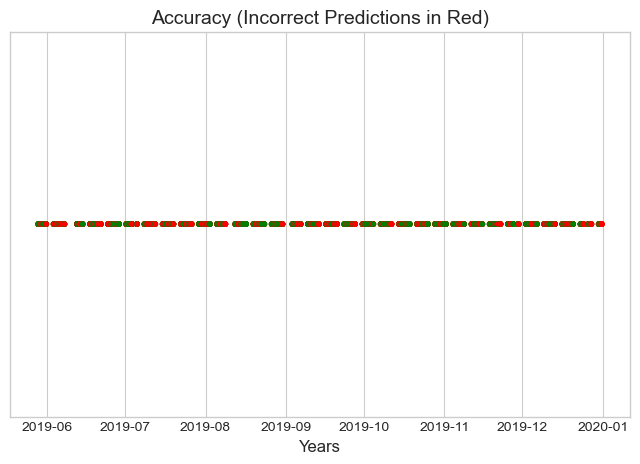

The accuracy is 51.55%


In [7]:
# Define the accuracy data
accuracy_data = (y_pred == y_test)

# Accuracy percentage
accuracy_percentage = round(100 * accuracy_data.sum() / len(accuracy_data), 2)

# Plot the accuracy data
plt.figure(figsize=(8, 5))

# Colour mapping for the correct and incorrect predictions
cmap = clrs.ListedColormap(['green', 'red'])

plt.yticks([])
plt.scatter(x=y_test.index, y=[1]*len(y_test), c=(accuracy_data != True).astype(float),
            marker='.', cmap=cmap)

# Set the title and axis label
plt.title("Accuracy (Incorrect Predictions in Red)", fontsize=14)
plt.xlabel('Years', fontsize=12)

# Display the results
plt.show()
print(f"The accuracy is {accuracy_percentage}%")

These calculations for the accuracy and other performance metrics can be donde using the ready-made `classification_report` method, which we will see in the final part of the chapter.

*Is the accuracy score enough to conclude that the ML model is effective?* Probably not. Consider a ML model designed to predict whether you should buy or sell. This model has an accuracy of 73%. But while using this model, the sell signals are not great and making losses.

**How is that possible for an ML model with 73% accuracy?** To get an answer to that question, you have to get the accuracy number label wise, or the action which the ML model will take. In this case, the accuracy for each buy and sell prediction. This will help you get a more granular view of how the model is performing.

It comes out that the ML model predicted 100 times that the price would go up, the price actually went up 90 times. And 10 times actually fell: So for predicting the `buy` signal, the model is 90% accurate, which is pretty good.

But for the `sell` signal, the model predicted 50 times that price would go down. The price went down only 20 times and 30 times it went up. The model is only 40% accurate in predicting the `sell` signal. Therefore, placing a sell order based on the model's recommendation is bound to be disastrous.

The following matrix is called a confusion matrix:

![alt text](assets/graph007.png)

Let us see the confusion matrix of our machine learning model:

```python
confusion_matrix(y_test, y_pred)
```

Where:
1. `y_test` The observed target from the training dataset
2. `y_pred` The predicted target from the model


The return is a `numpy` array of the confusion matrix.


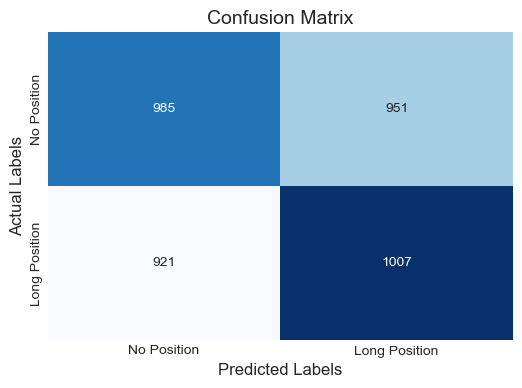

In [8]:
# Define the confusion matrix
confusion_matrix_data = confusion_matrix(y_test.values, y_pred.values)

# Plot the data
fix, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, fmt='d', cmap='Blues', cbar=False, annot=True, ax=ax)

# Set the axes labels and title
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

# Display the plot
plt.show()

The confusion matrix gives us the following information:

1. **True Positive:** 1007 correct predictions for taking a long position
2. **False Positive:** 951 incorrect predictions for taking a long position when the expected action was no position
3. **True Negative:** 985 correct predictions for taking no position
4. **False Negative:** 921 incorrect predictions for taking no position when the expected action was to take a long position

The confusion matrix helps us understand the effectiveness of the model, but it has its own limitation.

If you have more labels to classify, the confusion matrix grows. For example, three labels like buy, no position, and sell look like this:

